In [1]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\n_int\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\n_int\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import stock data from yahoo finance api
In this case. I choose PTT (The large oil company in Thailand)

In [2]:
start = datetime(2016,1,31)
end = datetime(2021,1,31)
ptt = data.DataReader('ptt.bk','yahoo',start)

In [3]:
ptt.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-01,24.500000,23.000000,23.500000,24.000000,122618000.0,18.852764
2016-02-02,23.700001,23.100000,23.700001,23.200001,65876000.0,18.224342
2016-02-03,23.400000,22.299999,22.600000,23.400000,140363000.0,18.381445
2016-02-04,24.299999,23.799999,24.000000,23.799999,121277000.0,18.695662
2016-02-05,24.200001,23.700001,24.000000,24.200001,59869000.0,19.009871
2016-02-08,24.400000,23.900000,24.000000,24.000000,44604000.0,18.852764
2016-02-09,24.100000,23.500000,23.700001,24.100000,71480000.0,18.931318
2016-02-10,23.799999,23.400000,23.700001,23.600000,87104000.0,18.538553
2016-02-11,23.600000,22.799999,23.299999,22.799999,121482000.0,17.910126


In [4]:
ptt.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-29,39.50,39.00,39.25,39.25,90070800.0,39.25
2021-09-30,39.25,38.75,39.00,39.00,63650300.0,39.00
2021-10-01,39.00,38.50,38.75,38.75,38212800.0,38.75
2021-10-04,39.50,39.00,39.00,39.00,53749600.0,39.00
2021-10-05,39.75,39.25,39.25,39.75,42021700.0,39.75


## Resampling data

Resampling is data transformation within time interval 

The cell below. We resample data with the average data within end of each month

In [5]:
ptt.resample('M').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-29,24.750000,24.085000,24.335000,24.440000,9.813395e+07,19.198400
2016-03-31,28.373913,27.686957,28.021739,28.000000,6.656987e+07,22.294480
2016-04-30,29.558824,28.952941,29.264706,29.305882,5.553559e+07,23.363020
2016-05-31,30.572222,29.911111,30.272222,30.166667,5.991856e+07,24.049249
2016-06-30,31.590909,31.040909,31.304545,31.350000,6.051168e+07,24.992617
...,...,...,...,...,...,...
2021-06-30,41.059524,40.309524,40.642857,40.547619,5.872277e+07,39.346208
2021-07-31,37.625000,36.837500,37.300000,37.100000,6.021883e+07,36.000741
2021-08-31,36.202381,35.416667,35.761905,35.821429,7.403572e+07,34.760052


In [6]:
close_df = ptt['Adj Close'].resample('M').mean()

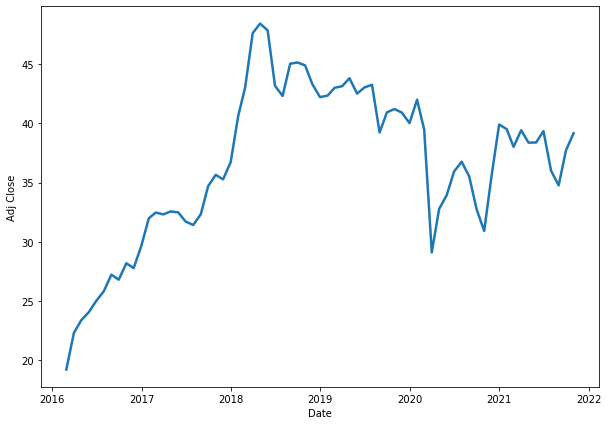

In [7]:
plt.figure(figsize=(10,7))
# sns.set_theme(style="whitegrid")
sns.lineplot(x=close_df.index,y=close_df,palette="tab10", linewidth=2.5)

In [8]:
mva_ptt_df = ptt.rolling(20).mean()

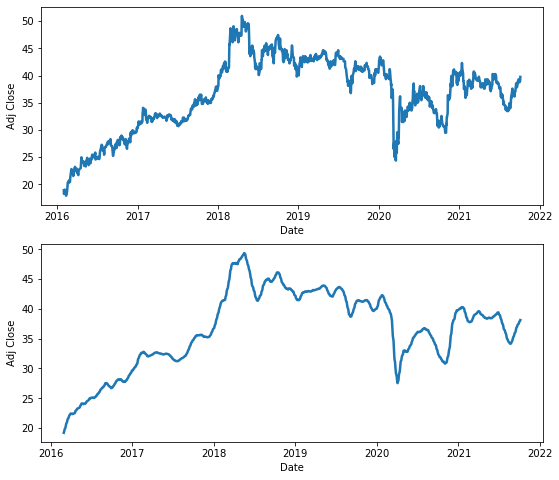

In [9]:
fig,ax = plt.subplots(2,1,figsize=(9,8))
sns.lineplot(x=ptt.index,y=ptt['Adj Close'],palette="tab10", linewidth=2.5,ax = ax[0])
sns.lineplot(x=mva_ptt_df.index,y=mva_ptt_df['Adj Close'],palette="tab10", linewidth=2.5,ax = ax[1])

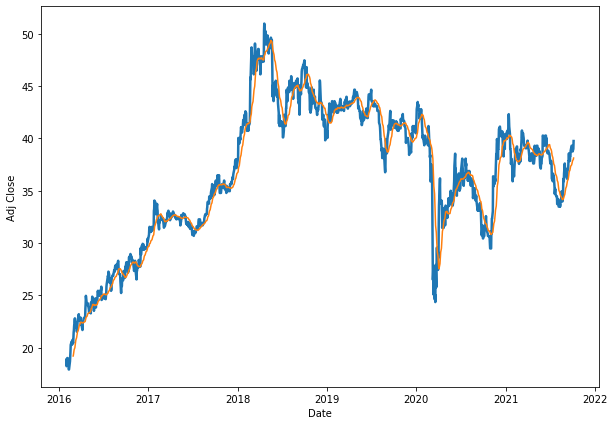

In [10]:
plt.figure(figsize=(10,7))
sns.lineplot(x=ptt.index,y=ptt['Adj Close'],palette="tab10", linewidth=2.5)
sns.lineplot(x=mva_ptt_df.index,y=mva_ptt_df['Adj Close'],palette="tab10")